# Cancerous Gene Expression Clustering

In today's day and age, perhaps no other industry has a better claim to the phrase 'big data' than the healthcare industry. With advancements in genomics, personalized medicine and treatments, or even cures, for genetic disorders seem closer than ever. Yet, with these advancements comes an enormous increase in the amount of data that needs to be analyzed. There are tens of thousands of genes in the human body and that's only counting protein-encoding genes. When trying to understsand the inner workings of a disease, there are often hundreds of different genes involved interacting in complex ways. We can measure and analyze the expression of these genes and quantify the role each plays in the emergence of a disease. In addition, we can use such measurements to distinguish between different yet similar types of diseases and even identify a particular gene expression pattern as a particular disease, but getting to this part is not easy.

In this analysis, we have a dataset containing a collection of gene expressions obtained from patients each possessing one of five different types of cancerous tumors. The data was originally collected by Samuele Fiorinifrom the University of Genoa and is now hosted by the University of California, Urvine on their [Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/gene+expression+cancer+RNA-Seq#).

The main goals of this analysis are to identify which genes exhibit the highest levels of expression, determine how well gene expression patterns of specific tumor types cluster together, and create a classification model that identifys the type of cancer based on the gene expressions provided.

Click on a link below to jump to a particular step in the project:

* [Data Processing & Exploration](#Data-Processing-&-Exploration)

* [Principal Component Analysis](#Principal-Component-Analysis)

* [Cluster Analysis](#Cluster-Analysis)

* [Classification Model](#Classification-Model)

    * [K-Nearest Neighbors](#K-Nearest-Neighbors)
    
    * [Support Vector Machine](#Support-Vector-Machine)
    
    * [Random Forest](#Random-Forest)
    
    * [Final Model](#Final-Model)
    
* [Conclusions](#Conclusions)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import math
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from subprocess import call
from IPython.display import Image
%matplotlib inline

In [2]:
# Reading in the data

data = pd.read_csv('data.csv')
labels = pd.read_csv('labels.csv')

## Data Processing & Exploration

In [3]:
data.head(5)

Unnamed: 0  gene_0    gene_1    gene_2    gene_3     gene_4  gene_5  \
0   sample_0     0.0  2.017209  3.265527  5.478487  10.431999     0.0   
1   sample_1     0.0  0.592732  1.588421  7.586157   9.623011     0.0   
2   sample_2     0.0  3.511759  4.327199  6.881787   9.870730     0.0   
3   sample_3     0.0  3.663618  4.507649  6.659068  10.196184     0.0   
4   sample_4     0.0  2.655741  2.821547  6.539454   9.738265     0.0   

     gene_6    gene_7  gene_8     ...      gene_20521  gene_20522  gene_20523  \
0  7.175175  0.591871     0.0     ...        4.926711    8.210257    9.723516   
1  6.816049  0.000000     0.0     ...        4.593372    7.323865    9.740931   
2  6.972130  0.452595     0.0     ...        5.125213    8.127123   10.908640   
3  7.843375  0.434882     0.0     ...        6.076566    8.792959   10.141520   
4  6.566967  0.360982     0.0     ...        5.996032    8.891425   10.373790   

   gene_20524  gene_20525  gene_20526  gene_20527  gene_20528  gene_20529  \
0    7.220030    9.119813   12.003135    9.650743    8.921326    5.286759   
1    6.256586    8.381612   12.674552   10.517059    9.397854    2.094168   
2    5.401607    9.911597    9.045255    9.788359   10.090470    1.683023   
3    8.942805    9.601208   11.392682    9.694814    9.684365    3.292001   
4    7.181162    9.846910   11.922439    9.217749    9.461191    5.110372   

   gene_20530  
0         0.0  
1         0.0  
2         0.0  
3         0.0  
4         0.0  

[5 rows x 20532 columns]

In [4]:
labels.head(5)

Unnamed: 0 Class
0   sample_0  PRAD
1   sample_1  LUAD
2   sample_2  PRAD
3   sample_3  PRAD
4   sample_4  BRCA

In [5]:
data.shape

(801, 20532)

In [6]:
data.describe()

gene_0      gene_1      gene_2      gene_3      gene_4  gene_5  \
count  801.000000  801.000000  801.000000  801.000000  801.000000   801.0   
mean     0.026642    3.010909    3.095350    6.722305    9.813612     0.0   
std      0.136850    1.200828    1.065601    0.638819    0.506537     0.0   
min      0.000000    0.000000    0.000000    5.009284    8.435999     0.0   
25%      0.000000    2.299039    2.390365    6.303346    9.464466     0.0   
50%      0.000000    3.143687    3.127006    6.655893    9.791599     0.0   
75%      0.000000    3.883484    3.802534    7.038447   10.142324     0.0   
max      1.482332    6.237034    6.063484   10.129528   11.355621     0.0   

           gene_6      gene_7      gene_8      gene_9     ...      gene_20521  \
count  801.000000  801.000000  801.000000  801.000000     ...      801.000000   
mean     7.405509    0.499882    0.016744    0.013428     ...        5.896573   
std      1.108237    0.508799    0.133635    0.204722     ...        0.746399   
min      3.930747    0.000000    0.000000    0.000000     ...        2.853517   
25%      6.676042    0.000000    0.000000    0.000000     ...        5.454926   
50%      7.450114    0.443076    0.000000    0.000000     ...        5.972582   
75%      8.121984    0.789354    0.000000    0.000000     ...        6.411292   
max     10.718190    2.779008    1.785592    4.067604     ...        7.771054   

       gene_20522  gene_20523  gene_20524  gene_20525  gene_20526  gene_20527  \
count  801.000000  801.000000  801.000000  801.000000  801.000000  801.000000   
mean     8.765891   10.056252    4.847727    9.741987   11.742228   10.155271   
std      0.603176    0.379278    2.382728    0.533898    0.670371    0.580569   
min      6.678368    8.669456    0.000000    7.974942    9.045255    7.530141   
25%      8.383834    9.826027    3.130750    9.400747   11.315857    9.836525   
50%      8.784144   10.066385    5.444935    9.784524   11.749802   10.191207   
75%      9.147136   10.299025    6.637412   10.082269   12.177852   10.578561   
max     11.105431   11.318243    9.207495   11.811632   13.715361   11.675653   

       gene_20528  gene_20529  gene_20530  
count  801.000000  801.000000  801.000000  
mean     9.590726    5.528177    0.095411  
std      0.563849    2.073859    0.364529  
min      7.864533    0.593975    0.000000  
25%      9.244219    4.092385    0.000000  
50%      9.566511    5.218618    0.000000  
75%      9.917888    6.876382    0.000000  
max     12.813320   11.205836    5.254133  

[8 rows x 20531 columns]

In [7]:
# Renaming columns

data.rename(columns={'Unnamed: 0':'sample'}, inplace=True)
labels.rename(columns={'Unnamed: 0':'sample', 'Class':'class'}, inplace=True)

# Appending the cancer labels to the data

full_data = pd.merge(data, labels, on='sample', how='outer')

# Base 2 log transformation of data will provide future parametric tests/models that are more accurate and reliable
# by making the data more symmetrical

full_data.iloc[:,1:20532] = np.log2(full_data.iloc[:,1:20532])

# Replacing undefined values, -inf, with 0

full_data = full_data.replace(-np.inf, 0)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log2
  del sys.path[0]


In [8]:
full_data.head()

sample  gene_0    gene_1    gene_2    gene_3    gene_4  gene_5    gene_6  \
0  sample_0     0.0  1.012361  1.707316  2.453777  3.382944     0.0  2.843014   
1  sample_1     0.0 -0.754548  0.667593  2.923369  3.266488     0.0  2.768936   
2  sample_2     0.0  1.812194  2.113433  2.782783  3.303157     0.0  2.801599   
3  sample_3     0.0  1.873269  2.172375  2.735320  3.349957     0.0  2.971475   
4  sample_4     0.0  1.409114  1.496486  2.709170  3.283665     0.0  2.715227   

     gene_7  gene_8  ...    gene_20522  gene_20523  gene_20524  gene_20525  \
0 -0.756646     0.0  ...      3.037427    3.281478    2.852005    3.189004   
1  0.000000     0.0  ...      2.872605    3.284060    2.645376    3.067228   
2 -1.143706     0.0  ...      3.022745    3.447399    2.433389    3.309118   
3 -1.201305     0.0  ...      3.136349    3.342202    3.160727    3.263216   
4 -1.470000     0.0  ...      3.152415    3.374871    2.844217    3.299671   

   gene_20526  gene_20527  gene_20528  gene_20529  gene_20530  class  
0    3.585339    3.270640    3.157258    2.402384         0.0   PRAD  
1    3.663863    3.394659    3.232331    1.066378         0.0   LUAD  
2    3.177161    3.291067    3.334921    0.751055         0.0   PRAD  
3    3.510036    3.277213    3.275657    1.718965         0.0   PRAD  
4    3.575608    3.204415    3.242022    2.353428         0.0   BRCA  

[5 rows x 20533 columns]

Let's take a look at the distribution of several characteristics of the the gene data.

In [9]:
# Let's determine the average levels of expression for each gene 

mean_gene_ex = full_data.iloc[:,1:-1].mean().transpose()
median_gene_ex =  full_data.iloc[:,1:-1].median().transpose()

# Now to repeat the same proces but for each cancer type individually

mean_class_gene_ex = full_data.iloc[:,1:].groupby('class').mean().transpose()
median_class_gene_ex = full_data.iloc[:,1:].groupby('class').median().transpose()

In [10]:
# To determine the top most expressed genes for each cancer type

#for col in mean_class_gene_ex.columns:
#    print(mean_class_gene_ex[col].sort_values(ascending=False)[:10])

In [11]:
# Function to create a histogram

def make_histogram(df, classes = 1, title = '', xlab = '', ylab = ''):
    
    if classes > 1:
        
        colors = ['olivedrab', 'forestgreen', 'limegreen', 'greenyellow', 'lawngreen']
        sns.set(font_scale = 1.5)
        plt.figure(figsize=(12,8))
        
        for i in range(0,classes):
            
            values = df.iloc[:,i]
            label = df.columns[i]
            color = colors[i]
            
            sns.distplot(values, hist = False, norm_hist = True, rug = False, color = color, label = label)

        plt.title(title, fontsize=20)
        plt.xlabel(xlab, fontsize=20)
        plt.ylabel(ylab, fontsize=20)
        plt.legend()
        plt.show();  

    else:
        
        sns.set(font_scale = 1.5)
        plt.figure(figsize=(12,8))
        sns.distplot(df, color = 'limegreen', kde = False)
        plt.title(title, fontsize=20)
        plt.xlabel(xlab, fontsize=20)
        plt.ylabel(ylab, fontsize=20)
        plt.show();
    

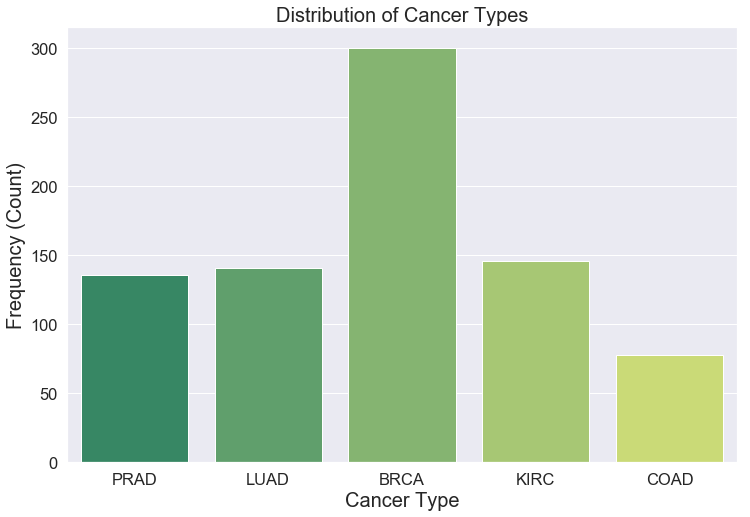

In [12]:
# Countplot of cancer types in the dataset

sns.set(font_scale = 1.5)
plt.figure(figsize=(12,8))
sns.countplot(full_data['class'], palette = 'summer')
plt.title('Distribution of Cancer Types', fontsize=20)
plt.xlabel('Cancer Type', fontsize=20)
plt.ylabel('Frequency (Count)', fontsize=20);

PRAD, LUAD, and KIRC appear with similar frequencies of ~150 while BRCA appears twice as much at ~300 and COAD appears half as much at ~75. When it comes time to build our model, it may be wise to downsample BRCA and upsample COAD in order to prevent the introduction of bias into our model.

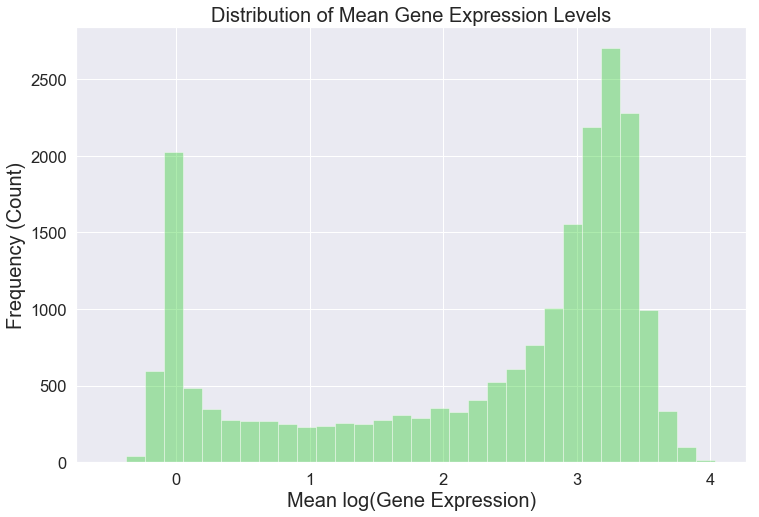

In [13]:
make_histogram(mean_gene_ex, title = 'Distribution of Mean Gene Expression Levels', xlab = 'Mean log(Gene Expression)', ylab = 'Frequency (Count)')

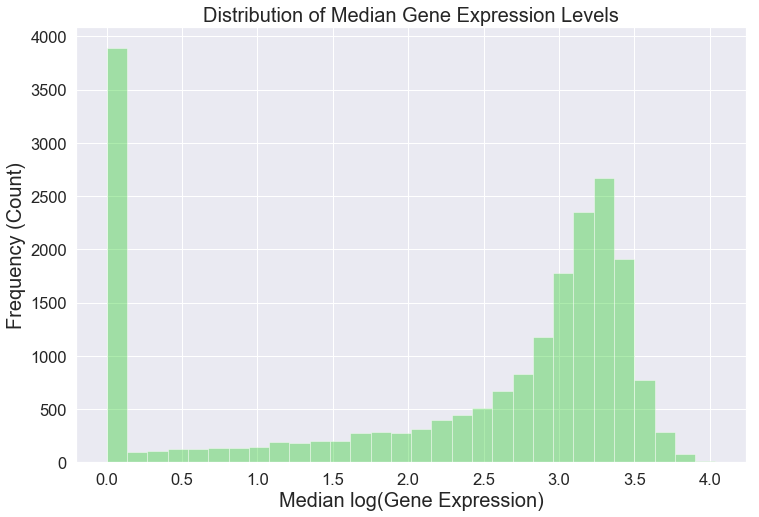

In [14]:
make_histogram(median_gene_ex, title = 'Distribution of Median Gene Expression Levels', xlab = 'Median log(Gene Expression)', ylab = 'Frequency (Count)')

Above, we have two similar plots both of which showing the distribution of the average log transform of gene expression among all 20,530 genes with the diference, between the two, being that one exhibits mean as the average while the other exhibits the median. We see similar results in both plots. In the first plot, we observe that the mean level of gene expression tends to have higher densities around 0 and 3. In fact, ~12% of genes have a mean expression level below 1.0 while ~50% exhibit a mean expression level between 8.0 and 16.0. Similarly, we observe that the median gene levels are are most often concentrated around 0 and 3. This translates to ~18% of genes with an expression below 1.0 and ~50% exhibiting a median expression level between 8.0 and 16.0.

As a note, expression levels are obtained by reversing the log transform on the mean and median values.

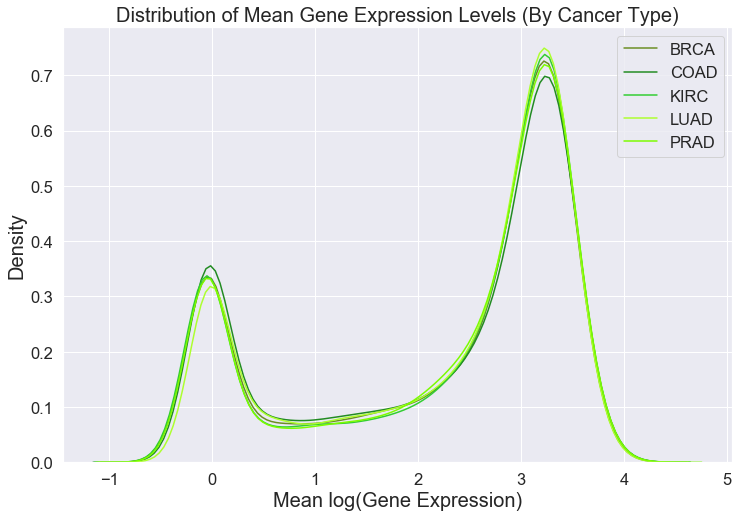

In [15]:
make_histogram(mean_class_gene_ex, classes = 5, title = 'Distribution of Mean Gene Expression Levels (By Cancer Type)', xlab = 'Mean log(Gene Expression)', ylab = 'Density')

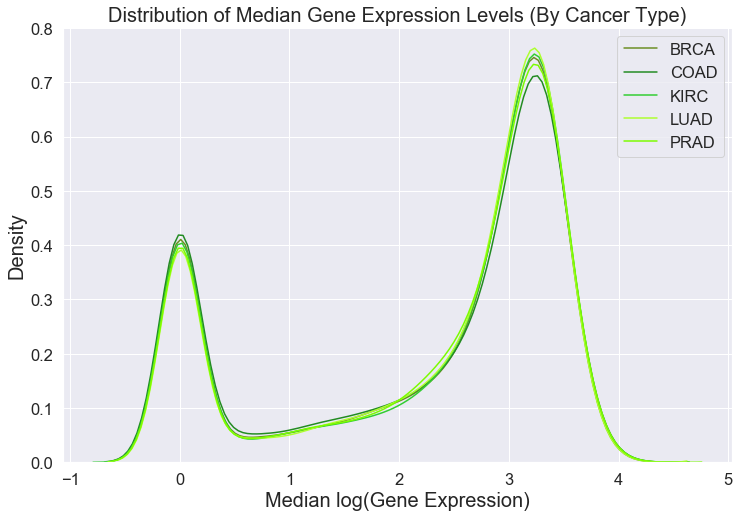

In [16]:
make_histogram(median_class_gene_ex, classes = 5, title = 'Distribution of Median Gene Expression Levels (By Cancer Type)', xlab = 'Median log(Gene Expression)', ylab = 'Density')

Above, we have density plots mirroring our previous graphs but, now, we have a seperate line plotted to represent each cancer type. The y-axis represents density. To interpret this graph in terms of the probabilities of observing the mean and median log transforms, the area under the curve would be computed for the interval of interest. Generally, we can determine the density of mean and median values by looking at the heights of the peaks in the graph. Genarally, a higher peak will equate to a higher density and, thus, a higher probability. And so, we again see that many of the genes exhibit mean and median expression levels of 1.0 and 8.0-16.0. In addition, we see almost the exact trend across all cancer types.

Below is a table summarizing the 10 genes with the highest mean levels of expression for each cancer type; each entry is a *'gene - log(expression level)'* pair:


|       BRCA        |        COAD       |       KIRC        |        LUAD       |        PRAD       |
|-------------------|-------------------|-------------------|-------------------|:-----------------:|
| gene_4041 - 4.04  | gene_230 - 4.07   | gene_5380 - 4.07  | gene_230 - 4.07   | gene_9176 - 4.19  |
| gene_230 - 4.04   | gene_5380 - 4.04  | gene_6857 - 4.06  | gene_6698 - 4.03  | gene_9175 - 4.06  |
| gene_5380 - 4.02  | gene_232 - 4.04   | gene_18570 - 4.03 | gene_289 - 4.02   | gene_5388 - 4.04  |
| gene_232 - 4.01   | gene_6857 - 4.02  | gene_3371 - 4.03  | gene_5380 - 4.01  | gene_5380 - 4.03  |
| gene_6566 - 4.01  | gene_3540 - 4.02  | gene_230 - 4.03   | gene_232 - 4.01   | gene_230 - 4.00   |
| gene_4042 - 4.00  | gene_18570 - 4.01 | gene_1322 - 4.02  | gene_3371 - 3.99  | gene_15242 - 3.99 |
| gene_4053 - 3.99  | gene_5388 - 4.00  | gene_19375 - 4.02 | gene_1322 - 3.98  | gene_18570 - 3.99 |
| gene_6857 - 3.95  | gene_9275 - 3.97  | gene_7899 -  3.99 | gene_18570 - 3.98 | gene_203 - 3.98   |
| gene_17077 - 3.95 | gene_15250 - 3.96 | gene_6698 - 3.99  | gene_6857 - 3.97  | gene_232 - 3.98   |
| gene_5388 - 3.94  | gene_6698 - 3.96  | gene_5590 - 3.98  | gene_6566 - 3.96  | gene_11409 - 3.95 |

With this information we may advance our understanding of the genes involved in the formation of specific types of tumor cells. Mind you, we only have the genes that are expressed the most while genetic disorders may appear as a result of the absence or inactivation of a gene as well. Nevertheless, we see that some of the genes in the table are, in fact common to all the cancer types explored. Genes 230 and 5380, for example, are highly expressed in each of the cancer types while others seem to be unique to the cancer type they fall under. Although, these seemingly exclusive genes may still be expressed in other cancers but their expression levels are not as pronounced causing them to be excluded from the table above.

## Principal Component Analysis

Principal Component Analysis (PCA), is a tool used for data visualization or data pre-processing before supervised techniques are applied. When faced with a large set of correlated variables, principal components allow us to summarize this set with a smaller number of representative variables that collectively explain most of the variability in the original set. In this way, PCA allows for the removal of noise from the data. PCA allows us to use principal components as predictors in a predictive model in place of the original larger set of variables. In addition, PCA allows us to take a dataset with many features and compress the information down to just a few variables allowing us to visualize the data into a 2-dimensional graph called a 'biplot'. These principal components do not have strict interpretations in the practical sense but they allow us to get a better 'feel' for the data in terms of the dimensions in which the data varies the most.

We will perform a PCA in order to create additional features that may improve the classification of each cancer type later on during the analysis. In addition, PCA will allow us to obtain a preliminary visualization of the data.       

In [17]:
# Performing PCA

pca = PCA(n_components = None)
pca_fit = pca.fit_transform(full_data.iloc[:,1:-1])
explained_var = pca.explained_variance_ratio_

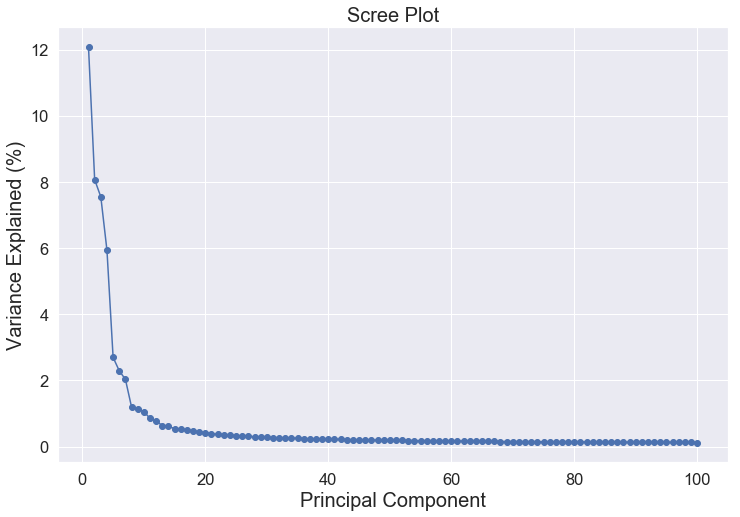

In [18]:
# Scree Plot

sns.set(font_scale = 1.5)
plt.figure(figsize=(12,8))
sns.scatterplot(x = range(1,101), y = (explained_var*100)[0:100], color = 'black')
plt.plot(range(1,101), ((explained_var*100)[0:100]),'-o')
plt.title('Scree Plot', fontsize=20)
plt.xlabel('Principal Component', fontsize=20)
plt.ylabel('Variance Explained (%)', fontsize=20)
plt.show();

In [19]:
# Calculating cumulative variance 
cum_var = []

for i in range(0,len(explained_var)):
    if i == 0:
        element = explained_var[i]*100 
        cum_var.append(element)
    if i > 0:
        element = explained_var[i]*100 
        element = element + cum_var[i-1]
        cum_var.append(element)


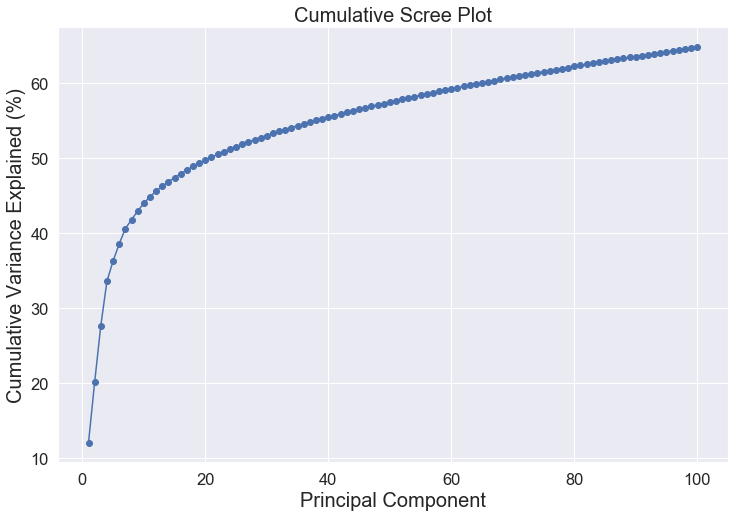

In [21]:
# Cumulative Scree Plot

sns.set(font_scale = 1.5)
plt.figure(figsize=(12,8))
sns.scatterplot(x = range(1,101), y = cum_var[0:100], color = 'black')
plt.plot(range(1,101), (cum_var[0:100]),'-o')
plt.title('Cumulative Scree Plot', fontsize=20)
plt.xlabel('Principal Component', fontsize=20)
plt.ylabel('Cumulative Variance Explained (%)', fontsize=20)
plt.show();

Looking at the previous scree plots, 100 out of the total 800 principal components ware plotted. Using the first 20 principal components, we are able to explain ~50% of the data. Arbitrarily, we will take these 20 components and use them in our model to come. Additional principal components do not seem to explain anything more than noise in the data as the amount of cumulative variance explained by the components seems to plateau, substantialy, after the 20th component. Although it continues to incrementally explain more and more of the variance, this is likely not to translate to a concrete explanation grounded in natural, biological mechanisms.

In [22]:
# Second Round of PCA

pca = PCA(n_components = 20)
data_pca_fit = pca.fit_transform(full_data.iloc[:,1:-1])
explained_var = pca.explained_variance_ratio_

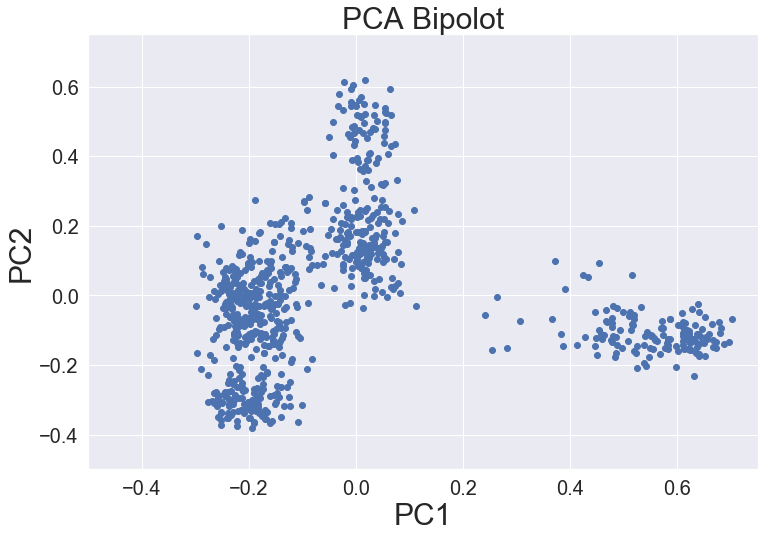

In [24]:
# Making a biplot

from biplot import biplot

plt.figure(figsize=(12,8))
biplot(data_pca_fit[:,0:2],np.transpose(pca.components_[0:2, :]), arrows = False)
plt.ylim(-0.5,0.75)
plt.xlim(-0.5,0.75)
plt.grid()
plt.show()

Above, we have a biplot. In a biplot, the data points of the dataset are plotted relative to the principal components that are provided; in this case, we utilize the first and second principal components. The closer observations are to each other, the greater similarities they possess. Taking into account that we already possess knowledge of the number of cancer types in our data, we can make out the five distinct groupings of data points on the biplot. The points cluster into, what seem to be, five different groups which tells us the first two principal components explain enough of the variance as to distinguish the different classes on a scatter plot. This increases our confidence that inclusion of the principle components into our predictive model will likely result in classifications that are inline with the true observations. 

Let's continue with a proper cluster analysis using the principle components.

In [25]:
new_data = (pd.DataFrame(data_pca_fit)).join(full_data.iloc[:,-1], how = 'outer')
new_data.columns = ['pca_1', 'pca_2', 'pca_3', 'pca_4', 'pca_5', 'pca_6', 'pca_7', 'pca_8', 'pca_9', 'pca_10', 
                    'pca_11', 'pca_12', 'pca_13', 'pca_14', 'pca_15', 'pca_16', 'pca_17', 'pca_18', 'pca_19',
                    'pca_20', 'class']

## Cluster Analysis

Clustering is a broad set of techniques for finding subgroups, or clusters, in a dataset. When we cluster the observations of a data set, we seek to partition them into distinct groups so that the observations within each group are similar to each other, while observations in different groups are different from each other. We are trying to find structure hidden in the dataset. 

For our purposes, we will utilize K-Means Clustering. In k-means clustering, we seek to partition the observations into a pre-specified number of clusters. We want to partition the observations into 'k' clusters such that the total 'within-cluster variation', summed over all clusters, is as small as possible. The variance within a cluster, 'k', is defined as the sum of all of the pairwise squared Euclidean distances between the observations in the kth cluster, divided by the total number of observations in the kth cluster. The k-means clustering algorithm often finds a local rather than a global optimum solution which is why it is important to run the algorithm multiple times from different random initial configurations. Then, the partition that provides the lowest total within-cluster variance across all clusters is chosen as the best solution.

Let's begin by first analyzing an elbow graph and try to infer, from the graph, what the optimal number of clusters should be. 

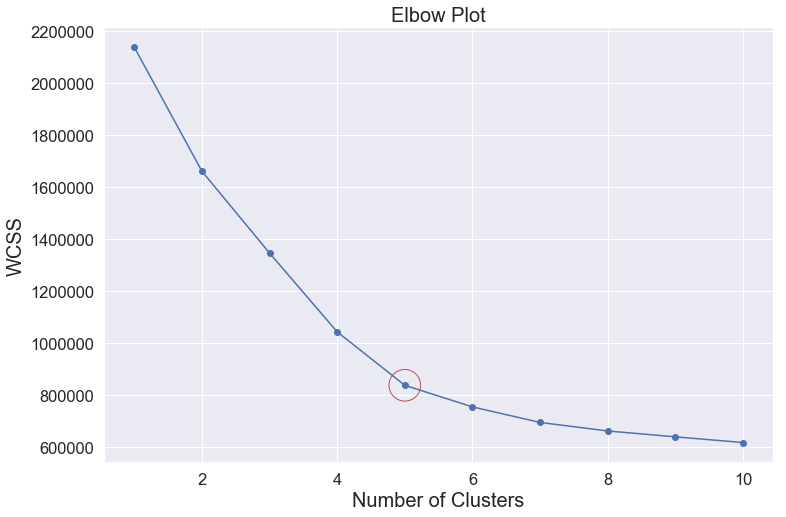

In [26]:
# Producing an elbow graph

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 2018)
    kmeans.fit(new_data.iloc[:,0:20])
    wcss.append(kmeans.inertia_)

sns.set(font_scale = 1.5)
plt.figure(figsize=(12,8))
sns.scatterplot(range(1,11), wcss)
plt.plot(range(1,11), wcss,'-o')
plt.scatter(5, 838658.0929355574, s=1000, facecolors='none', edgecolors='r')
plt.title('Elbow Plot', fontsize=20)
plt.xlabel('Number of Clusters', fontsize=20)
plt.ylabel('WCSS', fontsize=20)
plt.show()


In the plot above, we can distinguish a change in the slope of the line at a cluster value of 5. This tells us that the 'within-cluster sum of squares' (WCSS) decreases substantially with the number of clusters up until a number of 5 clusters, after which point the WCSS seems to continue decreasing linearly but at a slower rate than before. This continued decrease in the WCSS can most likely be attributed to overfitting as the distances between centroids and points continually decreasesas a function of the number of clusters no matter what the true number of groupings are in the data.

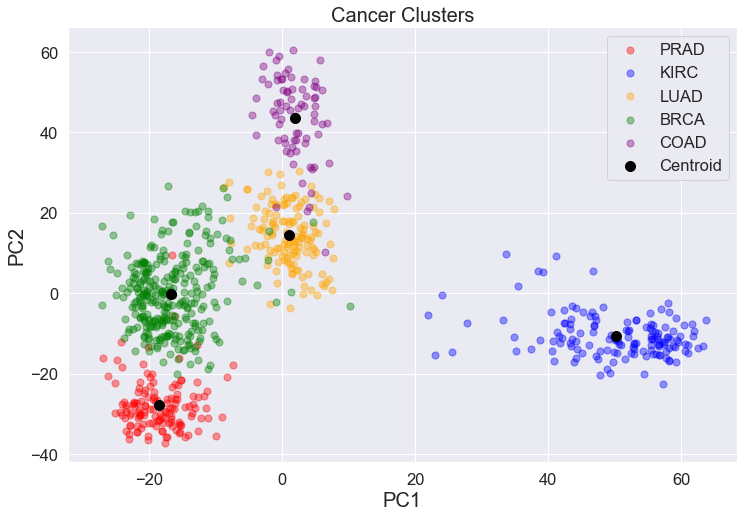

In [27]:
# Fitting the cluster model

kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 2018)
y_kmeans = kmeans.fit_predict(new_data.iloc[:,0:20])

# Plotting the results

sns.set(font_scale = 1.5)
plt.figure(figsize=(12,8))
plt.scatter(new_data.iloc[y_kmeans == 0, 0], new_data.iloc[y_kmeans == 0, 1], s=50, color = 'red', label = 'PRAD', alpha = 0.4)
plt.scatter(new_data.iloc[y_kmeans == 1, 0], new_data.iloc[y_kmeans == 1, 1], s=50, color = 'blue', label = 'KIRC', alpha = 0.4)
plt.scatter(new_data.iloc[y_kmeans == 2, 0], new_data.iloc[y_kmeans == 2, 1], s=50, color = 'orange', label = 'LUAD', alpha = 0.4)
plt.scatter(new_data.iloc[y_kmeans == 3, 0], new_data.iloc[y_kmeans == 3, 1], s=50, color = 'green', label = 'BRCA', alpha = 0.4)
plt.scatter(new_data.iloc[y_kmeans == 4, 0], new_data.iloc[y_kmeans == 4, 1], s=50, color = 'purple', label = 'COAD', alpha = 0.4)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, color = 'black', label = 'Centroid')
plt.title('Cancer Clusters', fontsize=20)
plt.xlabel('PC1', fontsize=20)
plt.ylabel('PC2', fontsize=20)
plt.legend()
plt.show();

Here we have our final result of clusters as assigned by K-Means. The cluster paterns that were detected possess a striking resemblance to the cluster we vaguely identified during the PCA. Let's quantify how well the algorithm was able to classify our data points.

In [28]:
# Evaluating model accuracy

dct = {'PRAD':0, 'KIRC':1,'LUAD':2,'BRCA':3, 'COAD':4}
cancer_map = list(map(dct.get, list(new_data['class'])))

print(classification_report(cancer_map, kmeans.labels_))
print(confusion_matrix(cancer_map, kmeans.labels_))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       136
          1       1.00      0.99      1.00       146
          2       0.98      0.99      0.98       141
          3       0.99      1.00      0.99       300
          4       1.00      0.97      0.99        78

avg / total       0.99      0.99      0.99       801

[[136   0   0   0   0]
 [  0 145   0   1   0]
 [  0   0 139   2   0]
 [  0   0   1 299   0]
 [  0   0   2   0  76]]


Above, we have a classification report accompanied by a confusion matrix. At first sight, the matrix seems sparse aside for the numbers in the diagnol. This gives us a feel that the clustering was able to correctly classify a majority of the data points with a few missess in between. According to the classification report, the average, weighted precision and recall of the model is 99%. This means that, respectively, out of all the predictions, 99% of them were correct and out of all the observations, 99% of them were labelled correctly.

These results further strengthen the impression that all 5 cancer types possess clear differences in their gene expression patterns that allow one to seperate them out using just the first two principal components, PC1 and PC2. We are now ready to build a predictive, classification model.

## Classification Model

In [29]:
# Balancing the cancer classes

stay_df = new_data.loc[new_data['class'].isin(['PRAD', 'KIRC', 'LUAD']),]
to_upsample_df = new_data.loc[new_data['class'] == 'COAD',]
to_downsample_df = new_data.loc[new_data['class'] == 'BRCA',]

# Downsampling 'BRCA' to 150

downsampled_df = resample(to_downsample_df, 
                                 replace=False,     # sample with replacement
                                 n_samples=150,    # to match 150 obs.
                                 random_state=2018) # reproducible results

# Upsampling 'COAD' to 150

upsampled_df = resample(to_upsample_df, 
                                 replace=True,    # sample without replacement
                                 n_samples=150,     # to match 150 obs.
                                 random_state=2018) # reproducible results

# Combine all resampled classes into single dataframe

balanced_data = pd.concat([stay_df, downsampled_df, upsampled_df])

balanced_data = balanced_data.sample(frac=1).reset_index(drop=True) # randomly shuffle the rows

In [30]:
# Creating a train-test split of the data

x = balanced_data.iloc[:,0:20]
y = balanced_data.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=2018)

Now, we will conduct preliminary tests on several models we believe will fair well for the task at hand. We will try a K-Nearest Neighbors (KNN), Support Vector Machine (SVM), and Random Forest approach.

### K-Nearest Neighbors

In [33]:
# Fitting the model

knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(x_train, y_train)

# Predicting test set results:

knn_predictions = knn.predict(x_test)

# Evaluating model accuracy:

print(classification_report(y_test, knn_predictions))
print(confusion_matrix(y_test, knn_predictions))


             precision    recall  f1-score   support

       BRCA       1.00      1.00      1.00        33
       COAD       1.00      1.00      1.00        38
       KIRC       1.00      1.00      1.00        24
       LUAD       1.00      1.00      1.00        25
       PRAD       1.00      1.00      1.00        25

avg / total       1.00      1.00      1.00       145

[[33  0  0  0  0]
 [ 0 38  0  0  0]
 [ 0  0 24  0  0]
 [ 0  0  0 25  0]
 [ 0  0  0  0 25]]


### Support Vector Machine

In [34]:
# Fitting the model:

svc_model = SVC(kernel = 'poly', random_state=2018)
svc_model.fit(x_train, y_train)

# Predicting test set results:

svm_predictions = svc_model.predict(x_test)

# Evaluating model accuracy:

print(classification_report(y_test, svm_predictions))
print(confusion_matrix(y_test, svm_predictions))

             precision    recall  f1-score   support

       BRCA       1.00      1.00      1.00        33
       COAD       1.00      1.00      1.00        38
       KIRC       1.00      1.00      1.00        24
       LUAD       1.00      1.00      1.00        25
       PRAD       1.00      1.00      1.00        25

avg / total       1.00      1.00      1.00       145

[[33  0  0  0  0]
 [ 0 38  0  0  0]
 [ 0  0 24  0  0]
 [ 0  0  0 25  0]
 [ 0  0  0  0 25]]


### Random Forest

In [35]:
# Fitting the model

rfc = RandomForestClassifier(random_state=2018)
rfc.fit(x_train, y_train)


# Predicting test set results

rf_predictions = rfc.predict(x_test)

# Evaluating model accuracy

print(classification_report(y_test, rf_predictions))
print(confusion_matrix(y_test, rf_predictions))


             precision    recall  f1-score   support

       BRCA       1.00      1.00      1.00        33
       COAD       1.00      1.00      1.00        38
       KIRC       1.00      1.00      1.00        24
       LUAD       1.00      1.00      1.00        25
       PRAD       1.00      1.00      1.00        25

avg / total       1.00      1.00      1.00       145

[[33  0  0  0  0]
 [ 0 38  0  0  0]
 [ 0  0 24  0  0]
 [ 0  0  0 25  0]
 [ 0  0  0  0 25]]


Based on the results above, it seems as if all of the models exhibit, virtually, identical performances on the test set predicting all observations with 99-100% accuracy.

Seeing as all models are of comparable performance, it would be wisest to select the simplest model with the greatest amount of interpretability. In this way, not only to we obtain the best possible classifier but also one who's decisions can be explained. The SVM produces a mathematical decision boundary which is, possibly, the least interpretable of the two if one were to try and combine the model's choices with domain knowledge. The KNN model does something similar to the SVM using purely euclidean distances to calculate which points are closest together and groups them as a class. The random forest seems like it could be the most interpretable of the three as one could print out the model trees themselves and track the choices the model makes throughout the trees along with the reasoning behind them.

### Final Model

In [37]:
# Export model as dot file

export_graphviz(rfc.estimators_[2], out_file='tree.dot', 
                feature_names = list(new_data.columns[:-1]),
                class_names = list((new_data['class']).unique()),
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)

call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook

Image(filename = 'tree.png')

Above, we have printed out one of the decision trees in our random forest model. As we can see, we are able to determine what class the model will predict for a given point based on certain criteria of the point that is evaluated at each junction.

In [38]:
# Looking at feature importances

feature_importances = pd.DataFrame(rfc.feature_importances_,
                                   index = x_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances.iloc[0:10]

importance
pca_1     0.235056
pca_3     0.220099
pca_2     0.166534
pca_4     0.109186
pca_5     0.076945
pca_7     0.048167
pca_14    0.017593
pca_10    0.015357
pca_9     0.014376
pca_16    0.013018

Finally, above, we have printed out the 10 'most important' features as determined by the model. Feature importance, in a random forest, is determined by a "gini importance" or "mean decrease impurity" measure and is defined as the total decrease in node impurity, defined as the proportion of observations reaching that node, averaged over all trees of the forest. Not surprisingly, the first three principal components of our previous PCA come out on top as they were shown to explain most of the variances in the data. Naturally, they also provide the greatest seperation between groupings of the dataset.

## Conclusions

In this analysis, we have determined that a majority of the genes, no matter the cancer type analyzed, exhibit either very high or little to no expression, relatively speaking. We were able to determine which genes exhibited the highest levels of expression for each individual cancer type allowing us to uncover highly expressed genes that were both common among all the cancer types as well as ones that were, seemingly, specific to certain cancers.

Through principal component analysis, we were able to decrease the feature space of the dataset from 20,000 down to 20 equating to a 1000X decrease in the number of features. Better yet, we discovered the these 20 components were sufficient to explain 50% of the variance in the data with the first three already explaining over 25% of the total variance. With a biplot, we were able to make out our five groups of cancers showing us that the first two principle compoennts alone were sufficient to seperating out our classes of cancer.

A k-means cluster analysis confirmed the ability of the principal compoennts to explain the variation amongst cancer types as it was able to classify data points into their correct groups 99% of the time. 

When came time to create a model for the classification of our cancer types, we discovered that the k-nearest neighbors, support vector machine, and random forest all performed equally well with accuracies of 99-100% on the test set. Although, it was concluded that the random forest would serve as the best as our final model due to its property of being sufficiently interpretable.

Of course, our final model could still be improved via parameter tuning of the random forest and made more efficient by further decreasing the number of principal components included in the feature space. 